# Data Loading and Preprocessing

In [2]:
# Importing Important Modules
import os
from skimage.io import imread,imshow
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

In [7]:
def load_data(path):
    filenames=os.listdir(path)

    data = []
    for f_name in filenames:
        data.append(path+'/'+f_name)

    # storing images in list from path
    image_dataset = []
    for img in data:
        a = imread(img)
        image_dataset.append(a)

    #Taking images which have same sizes
    image_dataset = image_dataset[121:]
    
    return image_dataset


#Printing Sample Images
def visulizeDataImages(image_dataset):
    fig = plt.figure(figsize=(15, 3))
    for i in range(10):
        ax = fig.add_subplot(1, 10, i + 1)
        ax.axis("off")
        ax.imshow(image_dataset[i],cmap="hot");
        

## Calling Function

# path = r"C:\Users\amany\Downloads\archive\Training\glioma"
# image_dataset = load_data(path)
# visulizeDataImages(image_dataset)

# Find and Visualize Correlation ::

In [5]:
def visulaizeDataCorr(image_dataset):
    corr_method1 = {}
    for i in range(0,10):

        x = image_dataset[i]
        flat_image1 = [num for sublist in x for num in sublist]
        new1 = pd.DataFrame(flat_image1)

        for j in range(0,10):
            y = image_dataset[j]

            flat_image2 = [num for sublist in y for num in sublist]
            new2 = pd.DataFrame(flat_image2)

            corr = new1.corrwith(new2,axis=0)
            corr = pd.DataFrame(corr)

            try:
                corr_method1[i].append(corr[0][0])
            except:
                corr_method1[i] = [corr[0][0]]

            if corr[0][0]>0.8:
                fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
                plt.subplots_adjust(hspace=0.8)
                ax1.imshow(image_dataset[i])
                ax2.imshow(image_dataset[j])
                ax1.set_title("Image - "+str(i)+", Corr : "+str(corr[0][0]),fontsize=18)
                ax2.set_title("Image - "+str(j)+", Corr :"+str(corr[0][0]),fontsize=18)
                #plt.savefig(str(i)+str(j)+".png")
                plt.show()

## Three Methods to get emergent image using correlation

### 1 - DOT PRODUCT



###### Newly generated image

In [3]:
def emergentImageUsingDotProduct(image_dataset):
    x1 = image_dataset[0]
    x1 = cv2.resize(x1,(128,128))
    for i in range(1,100):
        y = image_dataset[i]
        y = cv2.resize(y,(128,128))
        x1 = np.dot(x1,y.T)
    
    return x1


# Calling Function
# emergentImageUsingDotProduct(image_dataset)

### 2 - REMOVING HIGHLY CORRELATED FEATURE FROM INDIVIDUAL IMAGE

In [1]:
def highlyCorrelatedFeature(image_dataset):
    clean_dataset = []
    for i in tqdm(range(100),desc="Droping highly correlated part "):
        data = image_dataset[i]
        df = pd.DataFrame(data)

        # Create correlation matrix
        corr_matrix = df.corr().abs()

        # Select upper triangle of correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))

        # Find features with correlation greater than 0.95
        to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

        # Drop features
        df.drop(to_drop, axis=1, inplace=True)

        img_array = np.array(df)

        img = cv2.resize(img_array,(512,512))

        clean_dataset.append(img)
    return clean_dataset



def emergentImageUsingHighCorr(clean_dataset):
    x2 = clean_dataset[0]
    x2 = cv2.resize(x2,(128,128))
    for i in range(1,100):
        y = clean_dataset[i]
        y = cv2.resize(y,(128,128))
        x2 = np.dot(x2,y.T)

    print(x2.shape)
    plt.imshow(x2);

#Visualizing Highly correlated images
def plotCorrImage(clean_dataset):
    corr_method1 = {}
    for i in range(0,10):

        x = clean_dataset[i]
        flat_image1 = [num for sublist in x for num in sublist]
        new1 = pd.DataFrame(flat_image1)

        for j in range(0,10):
            y = clean_dataset[j]

            flat_image2 = [num for sublist in y for num in sublist]
            new2 = pd.DataFrame(flat_image2)

            corr = new1.corrwith(new2,axis=0)
            corr = pd.DataFrame(corr)

            try:
                corr_method1[i].append(corr[0][0])
            except:
                corr_method1[i] = [corr[0][0]]

            if corr[0][0]>0.7:
                fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
                plt.subplots_adjust(hspace=0.8)
                ax1.imshow(clean_dataset[i])
                ax2.imshow(clean_dataset[j])
                ax1.set_title("Image - "+str(i)+", Corr : "+str(corr[0][0]),fontsize=18)
                ax2.set_title("Image - "+str(j)+", Corr :"+str(corr[0][0]),fontsize=18)
                plt.savefig(str(i)+str(j)+".png")
                plt.show()

#Calling Functions

# clean_dataset = highlyCorrelatedFeature(image_dataset)
# emergentImage(clean_dataset)
# plotCorrImage(clean_dataset)

### 3 - REMOVING ONLY HIGHLY CORRELATED FEATURE W.R. TO FIRST IMAGE

In [2]:
def removeHighCorrelatedFeature(image_dataset):
    corr_method3 = []
    for i in tqdm(range(0,1),desc="Progress"):

        x = image_dataset[i]
        flat_image1 = [num for sublist in x for num in sublist]
        new1 = pd.DataFrame(flat_image1)

        for j in range(0,100):
            y = image_dataset[j]

            flat_image2 = [num for sublist in y for num in sublist]
            new2 = pd.DataFrame(flat_image2)

            corr = new1.corrwith(new2,axis=0)
            corr = pd.DataFrame(corr)

            if corr[0][0]>0.8:
                data = image_dataset[j]
                df = pd.DataFrame(data)

                # Create correlation matrix
                corr_matrix = df.corr().abs()

                # Select upper triangle of correlation matrix
                upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))

                # Find features with correlation greater than 0.95
                to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

                # Drop features 
                df.drop(to_drop, axis=1, inplace=True)

                img_array = np.array(df)

                img = cv2.resize(img_array,(512,512))

                corr_method3.append(img)
            else:
                corr_method3.append(y)
    corr_method3
    
def emergentImageUsingRemoveCorr(corr_method3):
    x3 = corr_method3[0]
    x3 = cv2.resize(x3,(128,128))
    for i in range(1,100):
        y = corr_method3[i]
        y = cv2.resize(y,(128,128))
        x3 = np.dot(x3,y.T)

    print(x3.shape)
    plt.imshow(x3);


#Calling Function

# clean_data = removeHighCorrelatedFeature(image_dataset)
# emergentImageUsingRemoveCorr(clean_data)

# COMPARING GENERATED IMAGES

In [4]:
def compareImages(org_img,gen_img):
    c=1
    for i,j in zip(org_img,gen_img):
        fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
        plt.subplots_adjust(hspace=0.8)
        ax1.imshow(i)
        ax2.imshow(j)
        ax1.set_title("GeneratedImage-"+str(c),fontsize=18)
        ax2.set_title("GeneratedDenoisedImage-"+str(c),fontsize=18)
        plt.savefig("generatedNoisyDenoisyImages_method_"+str(c)+".png")
        c+=1
        plt.show()

# Similarity between Generated Image

### Noisy Generated Image

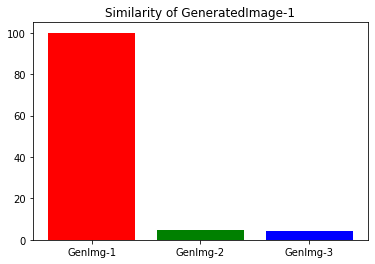

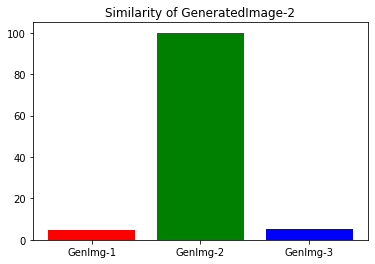

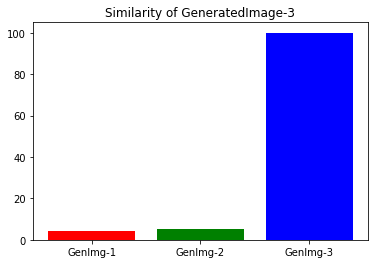

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

c=1
fig = plt.figure()
imgs = ['GenImg-1','GenImg-2','GenImg-3']
for i in [x1,x2,x3]:
    sim_lst = []
    for j in [x1,x2,x3]:
        sim_lst.append(100-mean_squared_error(i,j))
    plt.bar(imgs,sim_lst,color=['red', 'green', 'blue'])
    plt.title("Similarity of GeneratedImage-"+str(c))
    plt.savefig("Similarity_generatedImage_"+str(c)+".png")
    c+=1
    
    plt.show();

### Denoisy Generated Image

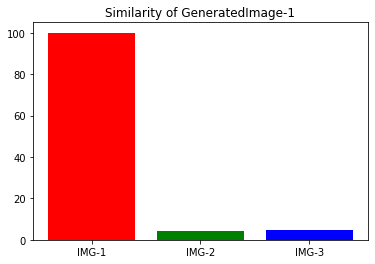

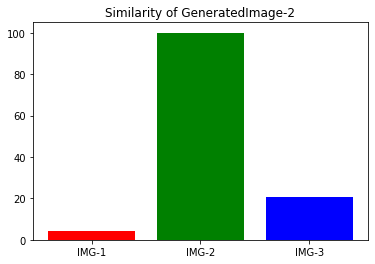

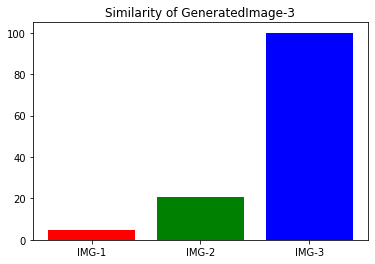

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

c=1
fig = plt.figure()
imgs = ['IMG-1','IMG-2','IMG-3']
for i in [new_img1,new_img2,new_img3]:
    sim_lst_mse = []
    for j in [new_img1,new_img2,new_img3]:
        sim_lst_mse.append(100 - mean_squared_error(i,j))
    plt.bar(imgs,sim_lst_mse,color=['red', 'green', 'blue'])
    plt.title("Similarity of GeneratedImage-"+str(c))
    plt.savefig("Denoisy_Similarity_generatedImage_"+str(c)+".png")
    c+=1
    plt.show();